# Importar

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Leer datos

In [2]:
PROJECT_ROOT = Path.cwd().parent
DATA_PATH_INPUT = PROJECT_ROOT / 'data' / 'raw' / 'raw.csv'

In [3]:
df_raw = pd.read_csv(DATA_PATH_INPUT, encoding='ISO-8859-1')

In [4]:
display(df_raw)

,Encuesta,Edad (años),Sexo,Escolaridad,Procedimiento,E1,E2,E3,E4,E5,...,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22
0,1,45,Femenino,Secundaria,Calificación accidente de trabajo,7,6,6,7,5,...,-1,0,-1,-1,0,0,0,0,-2,0
1,2,44,Masculino,Preparatoria,Dictamen Incapacidad Permanente Parcial,6,6,6,6,6,...,0,0,0,0,0,0,0,0,0,0
2,3,49,Femenino,Secundaria,Dictamen de Invalidez,7,7,7,7,7,...,2,3,3,2,2,2,2,2,2,2
3,4,28,Masculino,Preparatoria,Calificación accidente de trabajo,5,4,6,7,7,...,0,0,0,0,0,0,1,1,0,0
4,5,31,Masculino,Secundaria,Calificación accidente de trabajo,7,5,6,7,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,379,42,Femenino,Preparatoria,Dictamen beneficiario incapacitado,7,7,7,7,7,...,0,0,0,1,1,0,0,1,0,0
379,380,59,Masculino,Secundaria,Calificación enfermedad de trabajo,6,6,7,7,7,...,-1,-1,0,-1,-1,-1,0,0,0,0
380,381,39,Femenino,Licenciatura,Calificación accidente de trabajo,7,7,7,7,7,...,0,0,0,-2,-2,-2,-1,-1,0,-1
381,382,19,Femenino,Preparatoria,Calificación accidente de trabajo,6,6,6,6,6,...,-1,-1,-1,-1,0,0,0,0,-1,-1


Los datos se agrupan en una tabla de 383 filas y 71 columnas. Las primeras 4 columnas corresponden a datos generales de los pacientes encuentados, mientras que las siguientes columnas corresponden a la puntuación dada en las encuestas de expectativas o percepción del servicio médico recibido.

* Los nombres de las columnas comienzan con una letra mayúscula y el resto se escribe con minúsculas, para evitar errores por caractéres no visibles y estandarizar el formato se decidió utilizar el formato _snake case_ renombrando las columnas.
* Las columnas cuyo nombre comienza con una E al inicio seguido de un número corresponde al valor señalado por cada paciente en cada pregunta de la encuesta correspondiente a la expectativa del servicio de medicina del trabajo. 
* Las columnas que comienzan con una P seguida de un número en su nombre corresponden a la puntiación de cada pregunta de la encuesta que asigno el paciente después de recibir la atención médica (percepción).
* Las columnas que comienzan con una D seguida de un número en su nombre corresponden a las diferencias entre las expectativas y la percepción para cada pregunta evaluada.
* Se decidió modificar el encabezado de la columna Edad (años) a Edad.

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Encuesta       383 non-null    int64 
 1   Edad (años)    383 non-null    int64 
 2   Sexo           383 non-null    object
 3   Escolaridad    383 non-null    object
 4   Procedimiento  383 non-null    object
 5   E1             383 non-null    int64 
 6   E2             383 non-null    int64 
 7   E3             383 non-null    int64 
 8   E4             383 non-null    int64 
 9   E5             383 non-null    int64 
 10  E6             383 non-null    int64 
 11  E7             383 non-null    int64 
 12  E8             383 non-null    int64 
 13  E9             383 non-null    int64 
 14  E10            383 non-null    int64 
 15  E11            383 non-null    int64 
 16  E12            383 non-null    int64 
 17  E13            383 non-null    int64 
 18  E14            383 non-null   

Se observa que no hay valores nulos presentes en los datos inciales. Los valores de las columnas son tipo int (número entero) a excepción de las columnas Sexo, Escolaridad y Procedimiento que son del tipo object, lo cual es coherente con el tipo de dato esperado para cada columna.

In [6]:
duplicated = df_raw.duplicated().sum()
print('Número de filas duplicadas:', duplicated)

Número de filas duplicadas: 0


In [7]:
print(df_raw.columns)

Index(['Encuesta', 'Edad (años)', 'Sexo', 'Escolaridad', 'Procedimiento', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
       'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22',
       'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
       'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20',
       'D21', 'D22'],
      dtype='object')


In [8]:
# Estandarización de encabezados de columnas

df_raw.columns = (
    df_raw.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

In [9]:
print(df_raw.columns)

Index(['encuesta', 'edad_(años)', 'sexo', 'escolaridad', 'procedimiento', 'e1',
       'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12',
       'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22',
       'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11',
       'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21',
       'p22', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10',
       'd11', 'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20',
       'd21', 'd22'],
      dtype='object')


# Análisis de información general del paciente

Se definió la paleta de colores para representar el sexo femenino y masculino en la columna Sexo usando #F06292 para el sexo Femenino y #60A6FA para el sexo Masculino.

## Sexo

In [10]:
# Proporción de los valores en la columna

df_raw['sexo'].value_counts()

sexo
Femenino     200
Masculino    183
Name: count, dtype: int64

In [11]:
# Definir paleta de colores para el tono

custom_palette = {'Femenino' : '#F06292', 'Masculino' : '#60A6FA'}

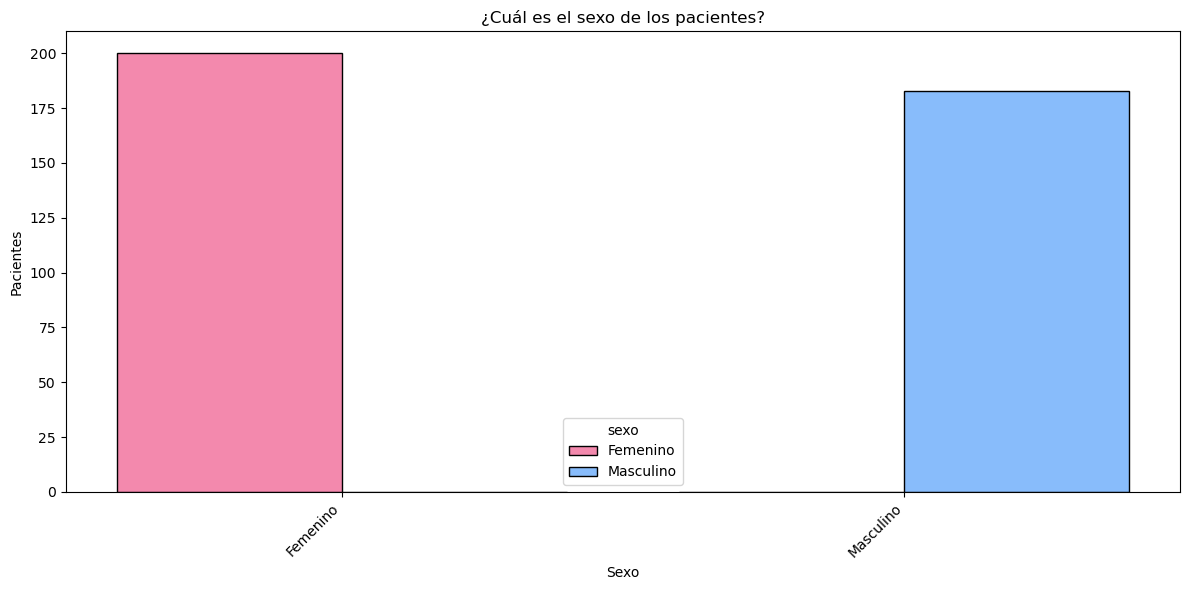

In [12]:
# Construir gráfico
plt.figure(figsize=(12,6))
sns.histplot(data=df_raw, x='sexo', hue='sexo', palette=custom_palette, multiple='dodge', shrink=0.8)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sexo')
plt.ylabel('Pacientes')
plt.title('¿Cuál es el sexo de los pacientes?')
plt.tight_layout()
plt.show()


Se observó que de los 383 pacientes 183 fueron hombres y 200 fueron mujeres.

## Edad

In [13]:
# Renombrar columna como Edad

df_raw = df_raw.rename(columns={'edad_(años)' : 'edad'})

In [14]:
df_raw['edad'].describe()

count    383.000000
mean      38.109661
std       12.042833
min       18.000000
25%       29.000000
50%       39.000000
75%       48.000000
max       60.000000
Name: edad, dtype: float64

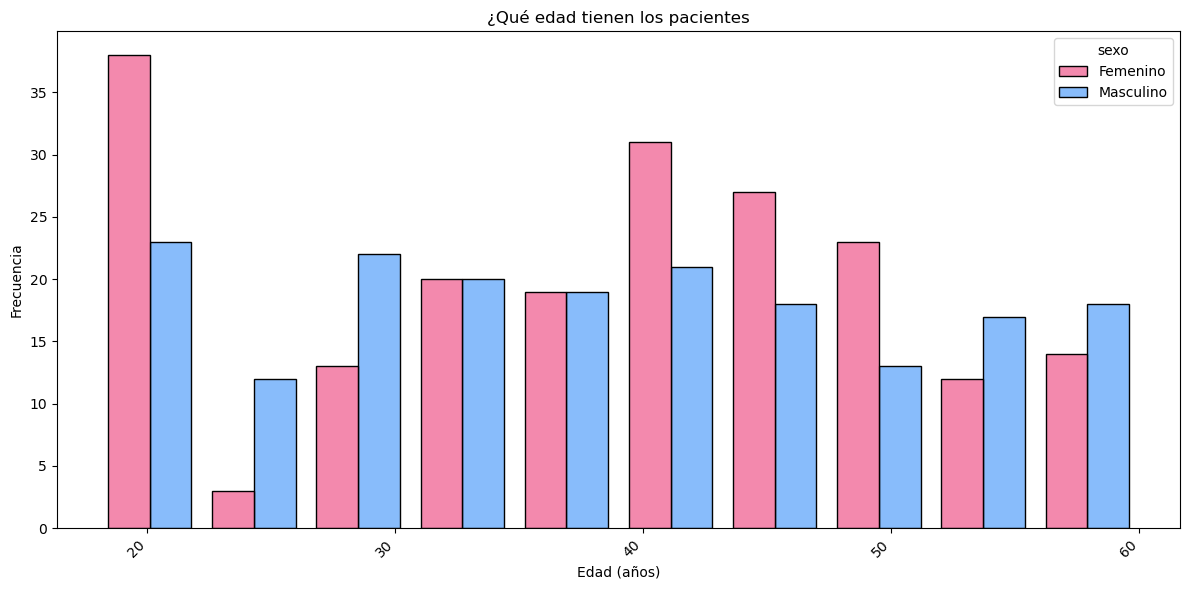

In [15]:
# Construir el gráfico
plt.figure(figsize=(12,6))
sns.histplot(data= df_raw, x='edad', hue='sexo', palette= custom_palette, multiple='dodge', shrink=0.8)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.title('¿Qué edad tienen los pacientes')
plt.tight_layout()
plt.show()


Se observó que la edad de los 383 pacientes encuestados se encuentra entre 18 y 60 años. Para analizar con mayor detenimiendo las edades de los pacientes se decide crear una nueva columna que indique la decada de vida del paciente abarcando desde la decada de los 20s hasta la decada de los 60s.

## Escolaridad

In [16]:
# Proporción de los valores de escolaridad

df_raw['escolaridad'].value_counts()

escolaridad
Preparatoria    148
Secundaria      136
Licenciatura     60
Primaria         34
Maestría          3
Analfabeta        2
Name: count, dtype: int64

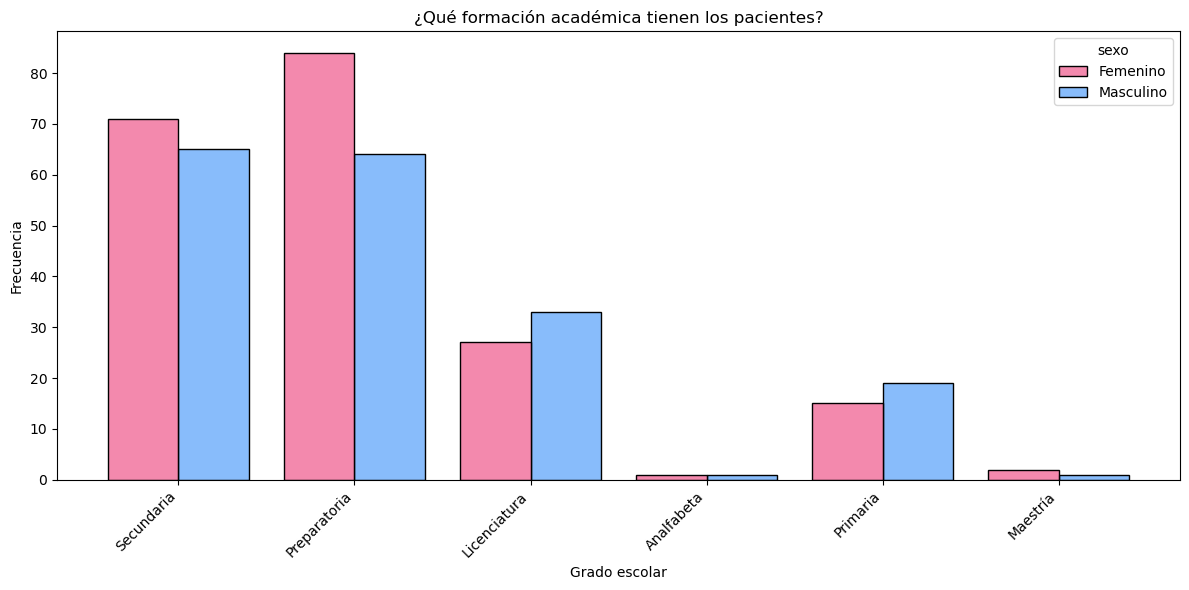

In [17]:
# Construir gráfico
plt.figure(figsize=(12,6))
sns.histplot(data=df_raw, x='escolaridad', hue='sexo', palette=custom_palette, multiple='dodge', shrink=0.8)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Grado escolar')
plt.ylabel('Frecuencia')
plt.title('¿Qué formación académica tienen los pacientes?')
plt.tight_layout()
plt.show()

La escolaridad de los pacientes encuestados fue muy diversa abarcando desde analfabetas hasta maestría. La mayor parte de los pacientes contaban con formación preparatoriana, siendo 148 casos. La segunda escolaridad más frecuente fue la formación a nivel secundaria con 136 casos. La siguiente formación académica más comun en orden descendiente de frecuencia corresponde a la licenciatura con 60 casos. Como se pudo observar a partir de esta escolaridad la frecuencia fue marcadamente menor. La escolaridad primaria contó con 34 casos. Las escolaridades de maestría y analfabetas fueron de 3 y 2 casos respectivamente.
Sin embargo, hay que recalcar que para el caso de las mujeres la escolaridad más común es la preparatoria seguida de la formación secuandaria, mientras que para los hombres ambas escolaridades tuvieron frecuencias muy similares, siendo ligeramente mayor la formación Secundaria. 


A nivel licenciatura la mayoría de los casos corresponden a pacientes masculinos y en menor proporción a pacientes femeninos, sin embargo a nivel maestría la tendencia se invirtio aunque hay que resaltar que los pocos casos contabilizados no son un criterio valido para hablar de una tendencia genereal de la población.

## Procedimiento

In [18]:
# Proporciones de los valores en la columna

df_raw['procedimiento'].value_counts()

procedimiento
Calificación accidente de trabajo          204
Dictamen Incapacidad Permanente Parcial     51
Dictamen de Invalidez                       48
Calificación enfermedad de trabajo          46
Dictamen beneficiario incapacitado          25
Dictamen de invalidez                        8
Dictamen incapacidad Permanente Total        1
Name: count, dtype: int64

Se observó la duplicación en el valor de un procedimiento:

- Dictamen de invalidez
- Dictamen de Invalidez

Debido a que el archivo .csv original no contenía dicho error es probable que se deba a un error en la importación de los datos, por lo que se decidió homogenizar a: __Dictamen de Invalidez__.

In [19]:
df_raw['procedimiento'] = df_raw['procedimiento'].replace('Dictamen de invalidez', 'Dictamen de Invalidez')

In [20]:
# Comprobar el cambio

df_raw['procedimiento'].value_counts()

procedimiento
Calificación accidente de trabajo          204
Dictamen de Invalidez                       56
Dictamen Incapacidad Permanente Parcial     51
Calificación enfermedad de trabajo          46
Dictamen beneficiario incapacitado          25
Dictamen incapacidad Permanente Total        1
Name: count, dtype: int64

El cambio se realizó con existo mostrando un total de 56 procedimientos contabilizados para el Dictamen de Invalidez.

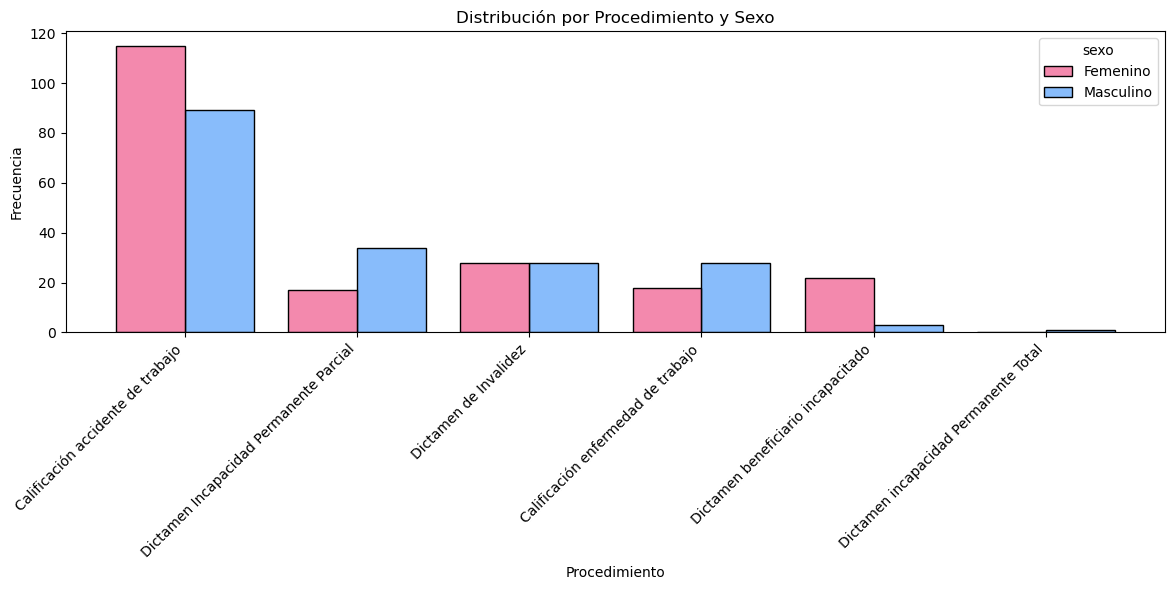

In [21]:
# Crear gráfico
plt.figure(figsize=(12, 6))
sns.histplot(data=df_raw, x='procedimiento', hue='sexo', palette=custom_palette, multiple='dodge', shrink=0.8)
## Rotar etiquetas en eje x
plt.xticks(rotation=45, ha='right')
plt.xlabel('Procedimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución por Procedimiento y Sexo')
plt.tight_layout()
plt.show()

Se observó que la mayoría de los pacientes encuestados acudieron por una calificación de accidente de trabajo con 204 casos, siendo la mayoría de los casos por diferencia. En orden descendente de ocurrencia los procedimientos mas frecuentes fueron: dictamen incapacidad permanente parcial, dictamen de invalidez, calificación de enfermedad de trabajo con 51, 48 y 46 casos respectivamente. Mientras que los más infrecuentes fueron dictamen de invalidez y dictamen incapacidad permanente total con 8 y 1 un casos respectivamente.

# Impresiones generales

Las relaciones entre las variables edad, escolaridad y sexo muestra:
- Una proporción ligeramente mayor de mujeres encuestadas en comparación a hombres encuestado
- La edad de los pacientes encuestados va de 18 a 60 años de edad con una promedio de 38 años.
- La escolaridad más común en mujeres es de preparotoria, sin embargo hay mayor proporción de ellas en el nivel maestría aunque sólo fueron dos casos los cuales no nos permite generalizar.
- La escolaridad más común en hombres es de secundaria, y a nivel licenciatura se encuentran en mayor proporción que las mujeres, sin embargo también tieden a no estudiar maestría en comparación a las mujeres.

# Guardar dataframe

In [22]:
DATA_PATH_OUTPUT = PROJECT_ROOT / 'data' / 'processed' / 'preprocessing.csv'

In [23]:
df_preprocessing = df_raw.copy()
df_preprocessing.to_csv(DATA_PATH_OUTPUT, index=False)